In [1]:
#1.1;- Importing Liabraries
import pandas as pd
import pylab as pl
import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#ML Liabraries
import itertools
import random 
import scipy
import pylab
import scipy.cluster.hierarchy
import scipy.optimize as opt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import svm 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from scipy.cluster.hierarchy import fcluster

In [3]:
df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\CO2_emission.csv')
pd.set_option('display.max_columns', None)
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [4]:
# Summarize the data
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [5]:
# Exploring few features in detail
cdf = df[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)','CO2_Emissions']]
cdf.head(9)

,Engine_Size,Cylinders,Fuel_Consumption_comb(L/100km),CO2_Emissions
0,2.4,4,8.6,199
1,3.5,6,11.0,256
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,2.0,4,8.7,205
7,2.0,4,9.2,217
8,2.9,6,11.6,271


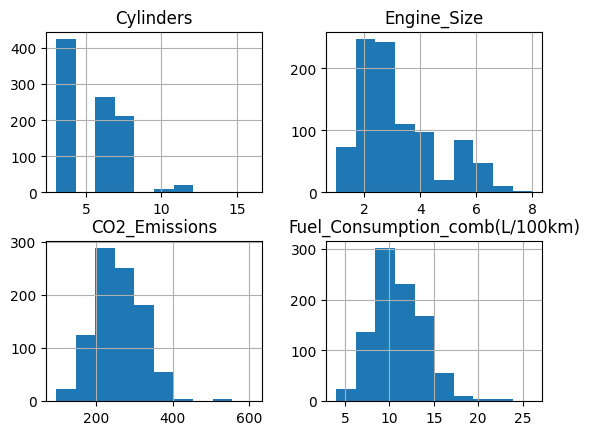

In [6]:
# plotting each of these features
viz = cdf[['Cylinders','Engine_Size','CO2_Emissions','Fuel_Consumption_comb(L/100km)']]
viz.hist()
plt.show()

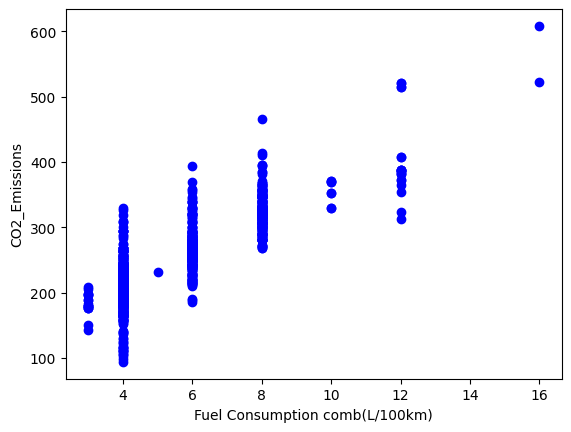

In [7]:
# Fuel Consumption comb(L/100km) vs CO2_Emissions
plt.scatter(cdf.Cylinders , cdf.CO2_Emissions,  color='blue')
plt.xlabel("Fuel Consumption comb(L/100km)")
plt.ylabel("CO2_Emissions")
plt.show()

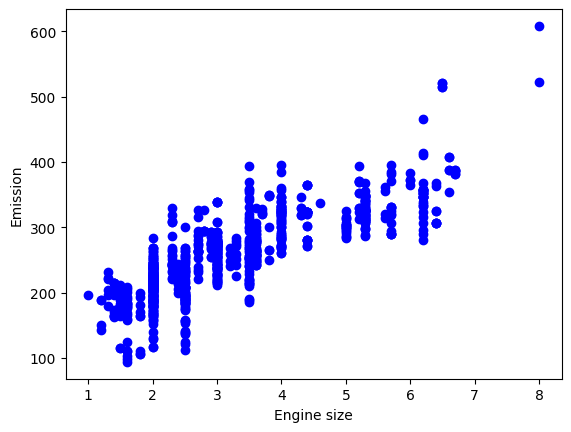

In [8]:
# Engine size vs Emission
plt.scatter(cdf.Engine_Size, cdf.CO2_Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
# Splitting our dataset into train and test sets.(80% , 20%)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regr.fit (train_x, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Emission')

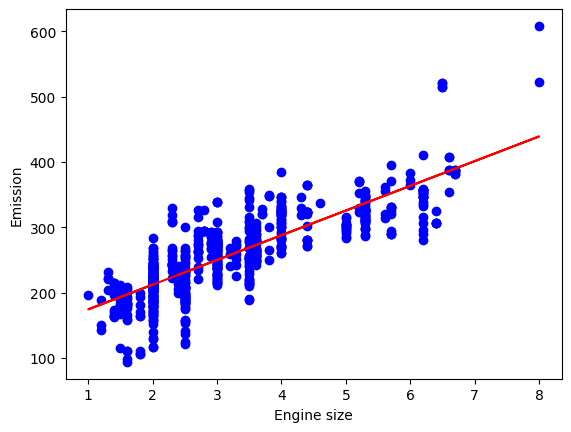

In [11]:
# Plotting the fit line over the data
plt.scatter(train.Engine_Size, train.CO2_Emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
# Evaluation

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
# variance score 1 is perfect prediction
print('Variance score: %.2f' % regr.score(train_x, train_y))

Mean absolute error: 28.68
Residual sum of squares (MSE): 1434.99
R2-score: 0.68
Variance score: 0.68


In [13]:
# Modeling
regr1 = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
y = np.asanyarray(train[['CO2_Emissions']])
regr1.fit (x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Predictions
y_hat= regr1.predict(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
x = np.asanyarray(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
y = np.asanyarray(test[['CO2_Emissions']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr1.score(x, y))

Residual sum of squares: 250.13
Variance score: 0.94


In [16]:
import pandas as pd

# Cargar el archivo con la ruta completa
china_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\china_gdp.csv')

# Mostrar las primeras filas
china_df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


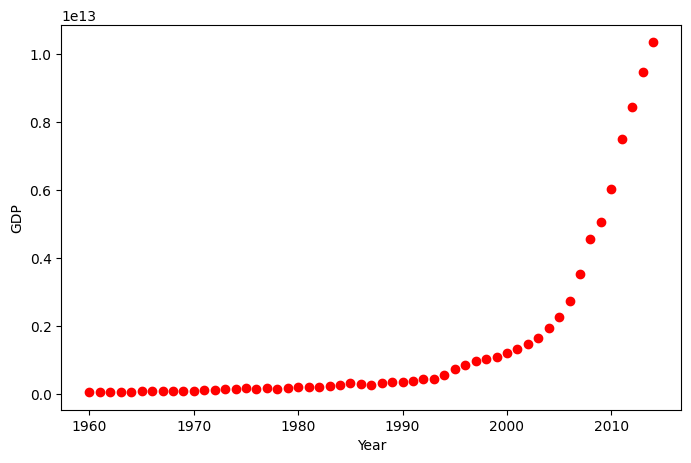

In [17]:
# Plotting the dataset
plt.figure(figsize=(8,5))
x_data, y_data = (china_df["Year"].values, china_df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

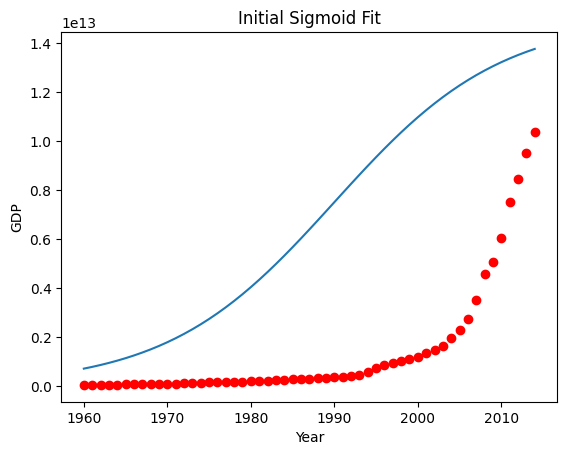

In [19]:
# Building the model
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

# Sample parameters
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# Plot initial prediction against datapoints
plt.plot(x_data, Y_pred * 15000000000000.)
plt.plot(x_data, y_data, 'ro')  # <- AQUÍ estaba el error
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Initial Sigmoid Fit")
plt.show()

In [20]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [21]:
#Finding the best parameters for our fit line
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


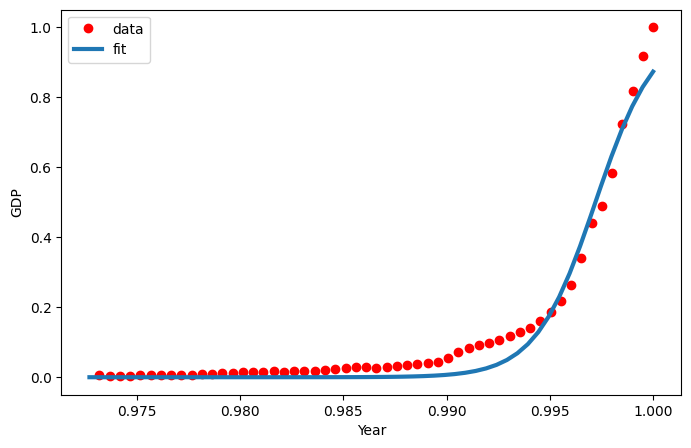

In [22]:
#Plotting our resulting regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [23]:
#Evaluating the accuracy of our model

# split data into train/test
msk = np.random.rand(len(china_df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.91


In [24]:
import pandas as pd

# Cargar el dataset desde tu ruta local
df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\CO2_emission.csv')

# Seleccionar columnas relevantes para regresión polinómica
poly_cdf = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']]

# Mostrar las primeras filas
poly_cdf.head()

,Engine_Size,Cylinders,Fuel_Consumption_comb(L/100km),CO2_Emissions
0,2.4,4,8.6,199
1,3.5,6,11.0,256
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230


In [25]:
# Creating train and test dataset
msk = np.random.rand(len(poly_cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])


poly_regr = PolynomialFeatures(degree=2)
train_x_poly = poly_regr.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

Text(0, 0.5, 'Emission')

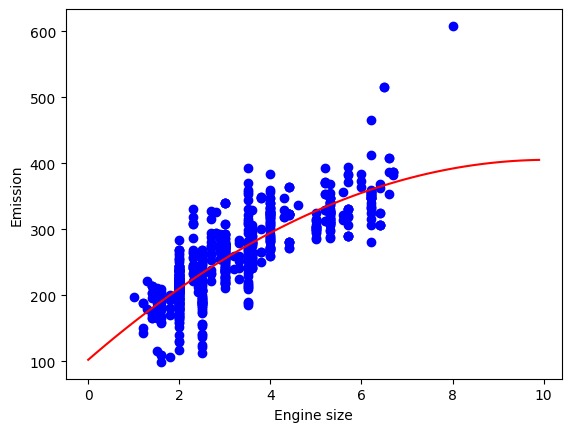

In [26]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

plt.scatter(train.Engine_Size, train.CO2_Emissions,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Coefficients:  [[  0.         143.38620375 -26.43312449   1.99237264]]
Intercept:  [13.86033376]
Mean absolute error: 27.65
Residual sum of squares (MSE): 1396.98
R2-score: 0.72


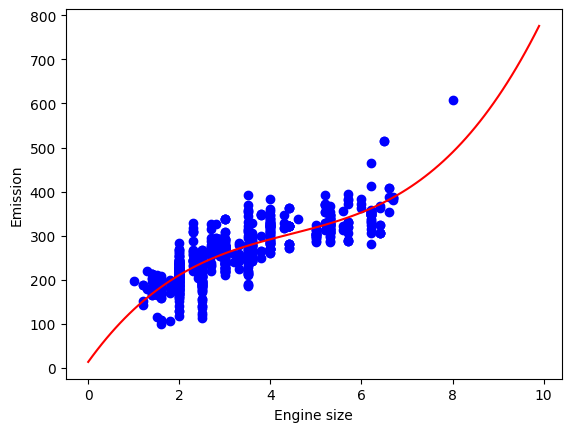

In [27]:
# Applying polynomial regression with this dataset but this time with degree three (cubic).
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.Engine_Size, train.CO2_Emissions,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

In [28]:
#Evaluation
test_x_poly = poly_regr.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 28.47
Residual sum of squares (MSE): 1490.04
R2-score: 0.70


In [29]:
import pandas as pd

# Cargar el dataset local
tel_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\telecom_cus.csv')

# Mostrar las primeras filas
tel_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [30]:
# Let’s see how many of each class is in our data set
tel_df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

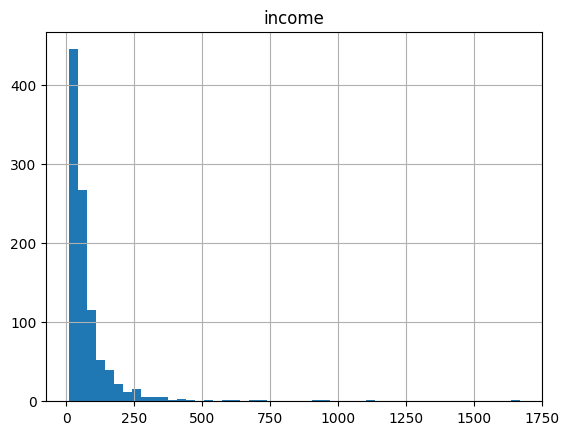

In [31]:
# You can easily explore your data using visualization techniques
tel_df.hist(column='income', bins=50)

In [32]:
tel_df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [33]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = tel_df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

y = tel_df['custcat'].values
y[0:5]

# Data Normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [34]:
# Let's start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
#Prediction
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [36]:
# Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [37]:
# Let's start the algorithm with k=6 for now:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


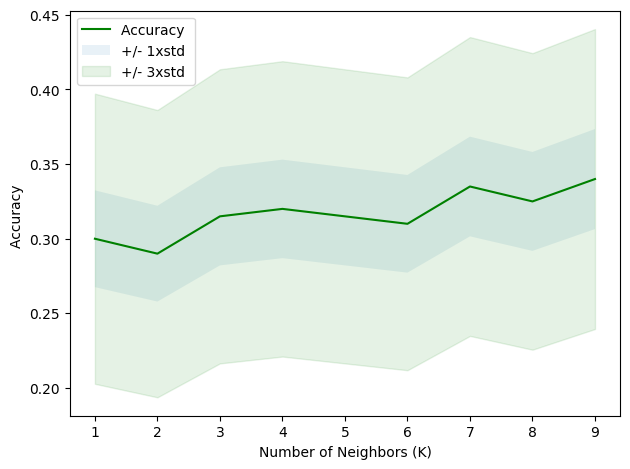

In [38]:
# We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


# Plot the model accuracy for a different number of neighbors and best value for K
plt.plot(range(1,10),mean_acc,'g')
plt.fill_between(range(1,10),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,10),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


In [40]:
import pandas as pd

# Cargar dataset local
drug_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\drug.csv')

# Mostrar las primeras filas
drug_df.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [41]:
drug_df.shape

(200, 6)

In [42]:
X = drug_df[['age', 'sex', 'bp', 'cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [43]:
# Converting categorical features to numerical values using pandas.get_dummies()
#from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [44]:
# Filling target variable
y = drug_df["drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: drug, dtype: object

In [45]:
# Train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [46]:
# Printing the shape of X_trainset and y_trainset to Ensure that the dimensions match.
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [47]:
# Modeling
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# it shows the default parameters
drugTree 

drugTree.fit(X_trainset,y_trainset)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
# Prediction
predTree = drugTree.predict(X_testset)

In [49]:
# Visually comparing the predictions to the actual values.
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: drug, dtype: object


In [50]:
# Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [51]:
import pandas as pd

# Cargar el dataset de churn local
churn_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\churn_Data.csv')

# Ver primeras filas
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0


In [52]:
#Data Pre-processing
churn_df.shape

(200, 10)

In [53]:
# Defining X and Y for our dataset
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

y = np.asarray(churn_df['churn'])

In [54]:
# Normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Spliting our dataset into train and test set:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [55]:
# Modeling

#Fitting our model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [56]:
yhat_prob = LR.predict_proba(X_test)

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
# 1.jaccard index
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

In [58]:
# 2.Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


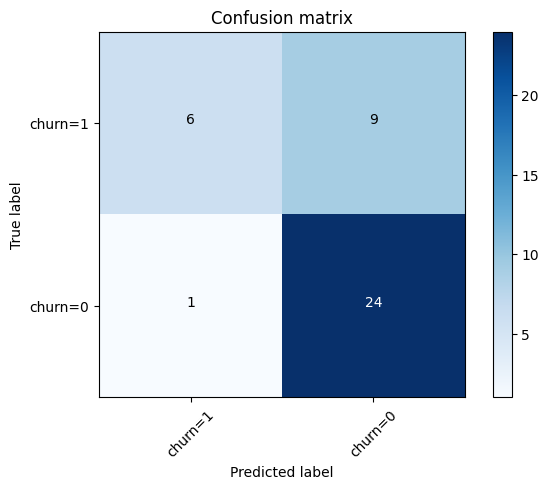

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [60]:
# Based on the count of each section, we can calculate precision and recall of each label
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [61]:
# 3.Log Loss
log_loss(y_test, yhat_prob)

0.6017092478101185

In [62]:
import pandas as pd

# Cargar el dataset cell_samples
cell_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\cell_samples.csv')

# Mostrar las primeras filas
cell_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


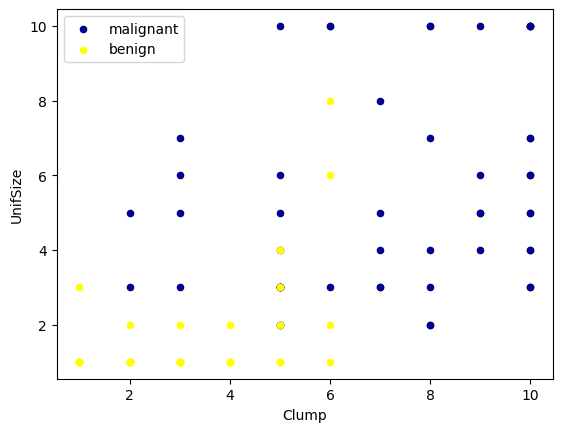

In [63]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [64]:
# Data pre-processing
cell_df.dtypes

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [65]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [66]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [67]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [68]:
# Split our dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [69]:
# Modeling
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [70]:
# After being fitted, the model can then be used to predict new values
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [72]:
# Evaluation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


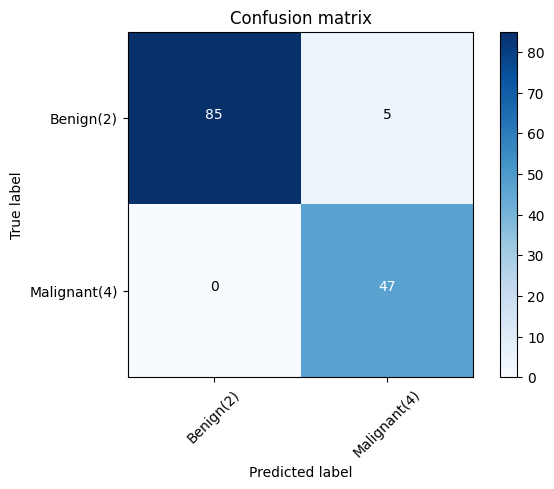

In [73]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [74]:
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [75]:
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

In [76]:
import pandas as pd

# Cargar dataset de segmentación de clientes
cust_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\cust_segmentation_Data.csv')

# Ver las primeras filas
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [77]:
# Normalizing over the standard deviation
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74,  0.31, -0.38, ..., -0.59, -0.52, -0.58],
       [ 1.49, -0.77,  2.57, ...,  1.51, -0.52,  0.39],
       [-0.25,  0.31,  0.21, ...,  0.8 ,  1.91,  1.6 ],
       ...,
       [-1.25,  2.47, -1.26, ...,  0.04,  1.91,  3.46],
       [-0.38, -0.77,  0.51, ..., -0.7 , -0.52, -1.08],
       [ 2.11, -0.77,  1.1 , ...,  0.16, -0.52, -0.23]])

In [78]:
# Modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

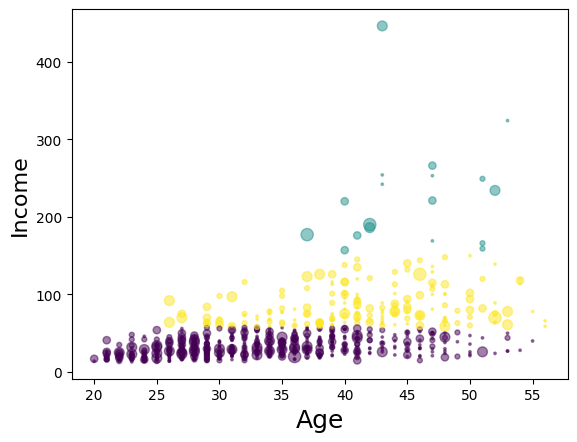

In [80]:
# Visualizar distribución de clientes por edad e ingreso
area = np.pi * (X[:, 1])**2  # El tamaño del punto está basado en la segunda columna

plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

X shape: (850, 8)
labels shape: (850,)


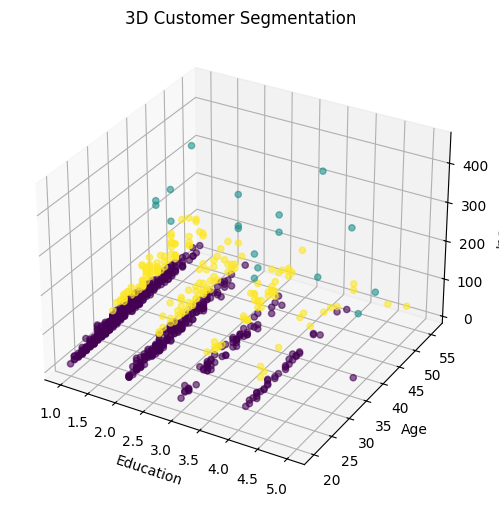

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Verifica dimensiones de tus datos
print("X shape:", X.shape)
print("labels shape:", labels.shape)

# Crear figura y gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# Gráfico 3D con color por cluster
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float), alpha=0.6)
plt.title("3D Customer Segmentation")
plt.show()

In [84]:
import pandas as pd

# Cargar el archivo cars_clus.csv desde tu computadora
cars_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\cars_clus.csv')

# Mostrar las primeras filas
cars_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [86]:
import pandas as pd

# Cargar dataset en df1
df1 = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\cars_clus.csv')

# Mostrar tamaño original
print("Shape of dataset before cleaning: ", df1.size)

# Convertir columnas a valores numéricos, forzando errores a NaN
df1[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']] = df1[['sales', 'resale', 'type', 'price', 'engine_s',
                               'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt',
                               'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
df1 = df1.dropna()

# Reiniciar índice
df1 = df1.reset_index(drop=True)

# Mostrar tamaño final
print("Shape of dataset after cleaning: ", df1.size)

# Ver primeras filas
df1.head(5)

Shape of dataset before cleaning:  1872
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [87]:
# Feature selection
featureset = df1[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [88]:
# Normalization
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11, 0.22, 0.19, 0.28, 0.31, 0.23, 0.13, 0.43],
       [0.31, 0.43, 0.34, 0.46, 0.58, 0.5 , 0.32, 0.33],
       [0.36, 0.39, 0.48, 0.53, 0.63, 0.61, 0.35, 0.23],
       [0.11, 0.24, 0.22, 0.34, 0.38, 0.34, 0.28, 0.4 ],
       [0.26, 0.37, 0.35, 0.81, 0.57, 0.52, 0.38, 0.23]])

In [90]:
import numpy as np
import scipy.spatial
import scipy.cluster.hierarchy as sch

# Supongo que feature_mtx ya fue creado antes (ej. con variables numéricas normalizadas)
leng = feature_mtx.shape[0]

# Crear matriz de distancias vacía
D = np.zeros((leng, leng))

# Llenar la matriz de distancias euclidianas
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# Mostrar la matriz (opcional)
D

array([[0.  , 0.58, 0.75, ..., 0.29, 0.25, 0.19],
       [0.58, 0.  , 0.23, ..., 0.36, 0.66, 0.62],
       [0.75, 0.23, 0.  , ..., 0.52, 0.82, 0.78],
       ...,
       [0.29, 0.36, 0.52, ..., 0.  , 0.42, 0.36],
       [0.25, 0.66, 0.82, ..., 0.42, 0.  , 0.15],
       [0.19, 0.62, 0.78, ..., 0.36, 0.15, 0.  ]])

In [91]:
# Normalization
Z = hierarchy.linkage(D, 'complete')
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [92]:
# You can determine the number of clusters directly
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

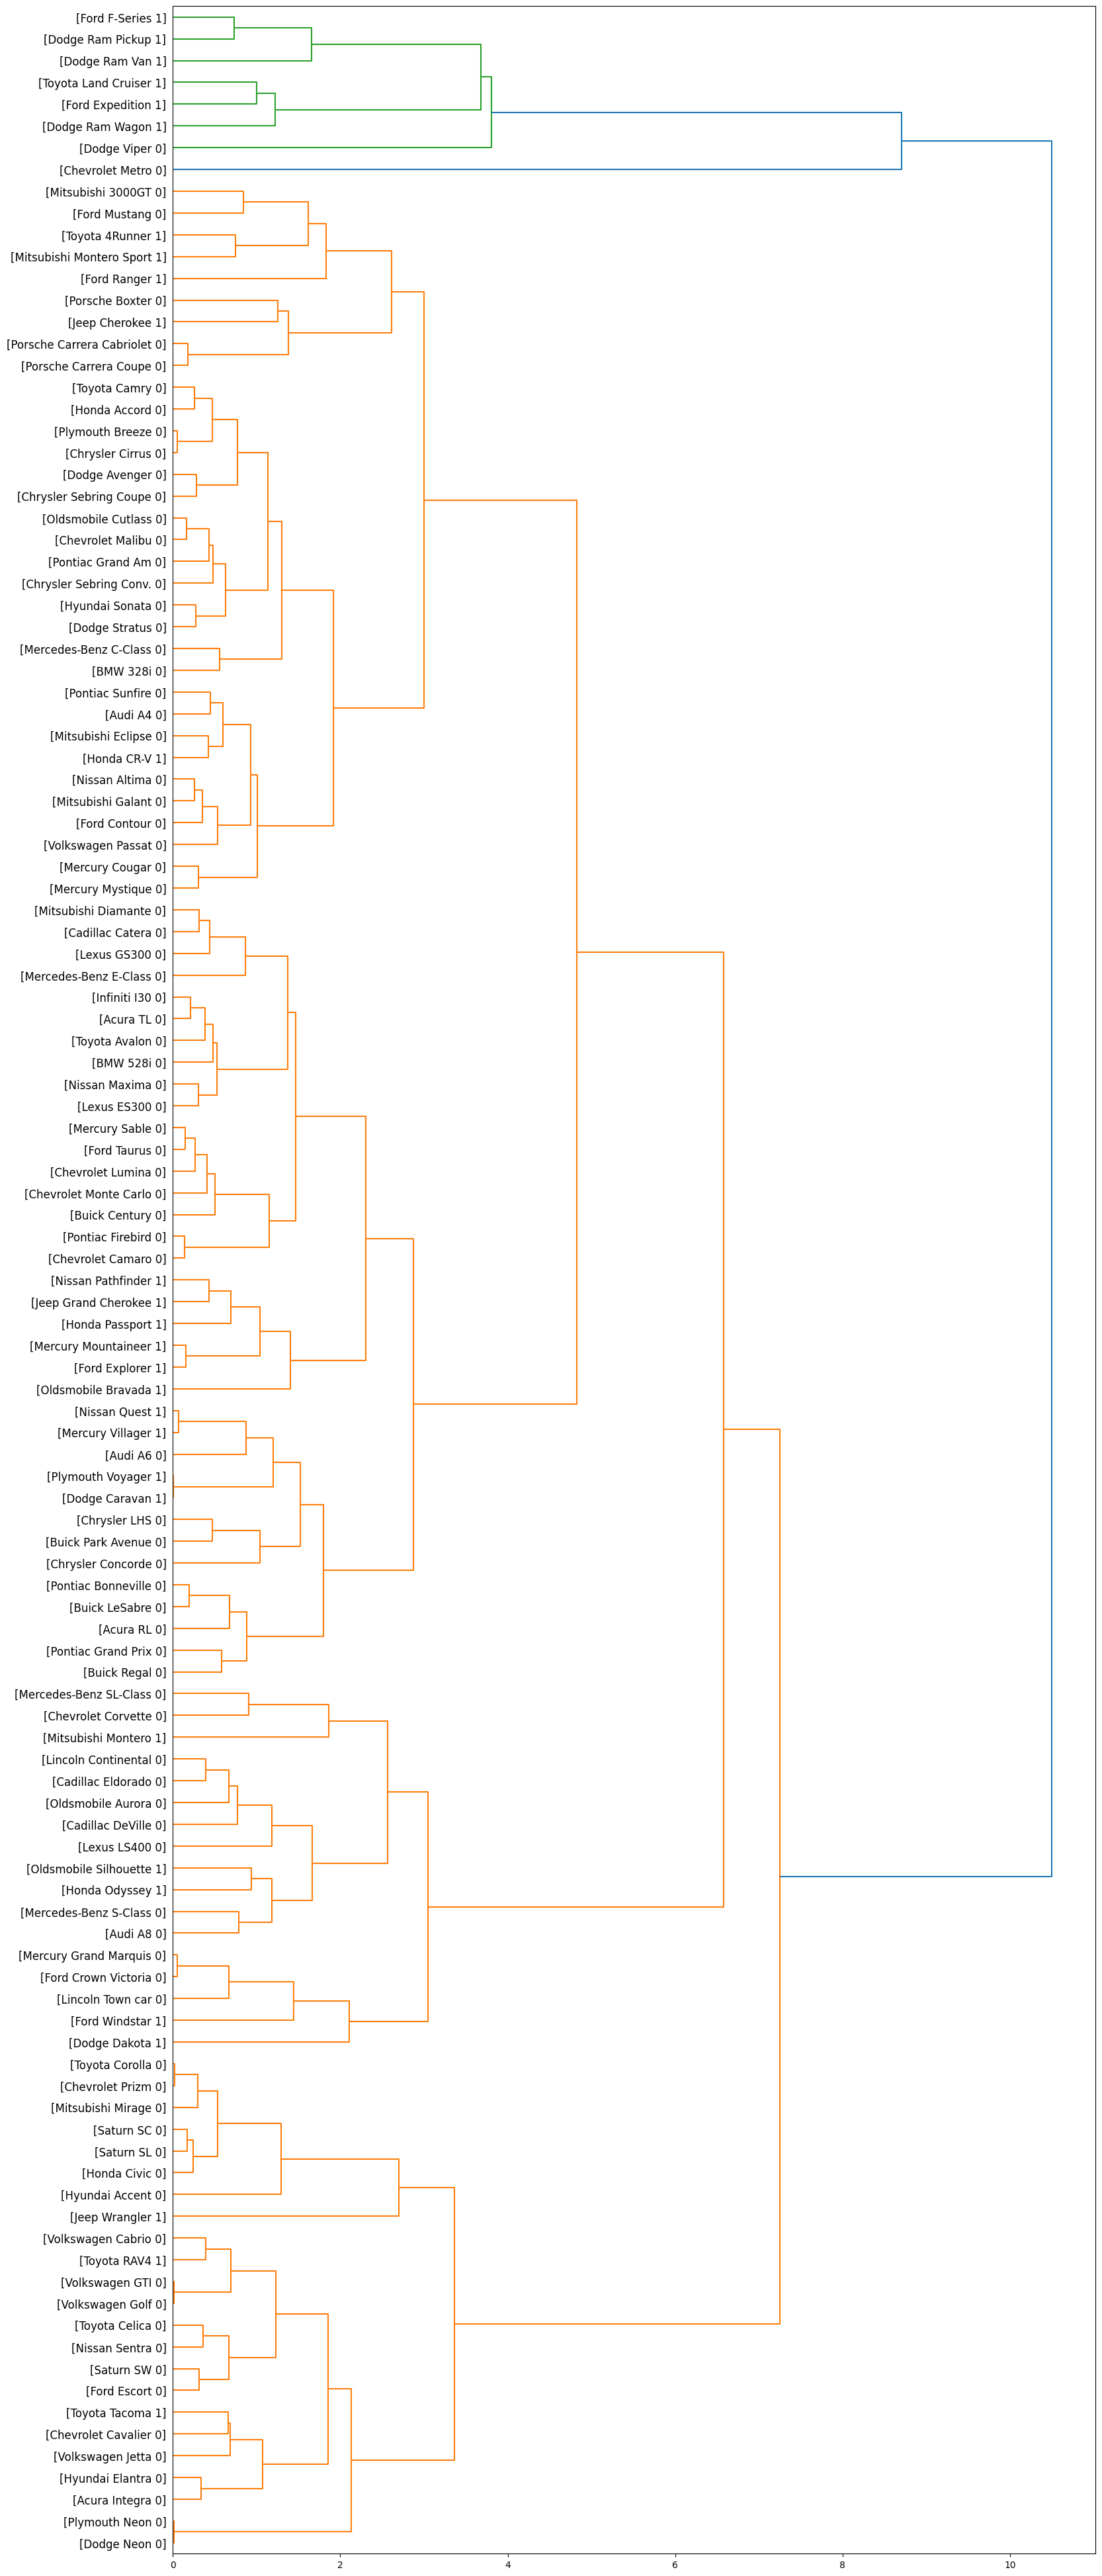

In [93]:
# plotting the dendrogram:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df1['manufact'][id], df1['model'][id], int(float(df1['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [94]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.   0.58 0.75 ... 0.29 0.25 0.19]
 [0.58 0.   0.23 ... 0.36 0.66 0.62]
 [0.75 0.23 0.   ... 0.52 0.82 0.78]
 ...
 [0.29 0.36 0.52 ... 0.   0.42 0.36]
 [0.25 0.66 0.82 ... 0.42 0.   0.15]
 [0.19 0.62 0.78 ... 0.36 0.15 0.  ]]


In [95]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [96]:
#we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset.
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [97]:
# We can add a new field to our dataframe to show the cluster of each row:
df1['cluster_'] = agglom.labels_
df1.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,2
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,3
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


Text(0, 0.5, 'mpg')

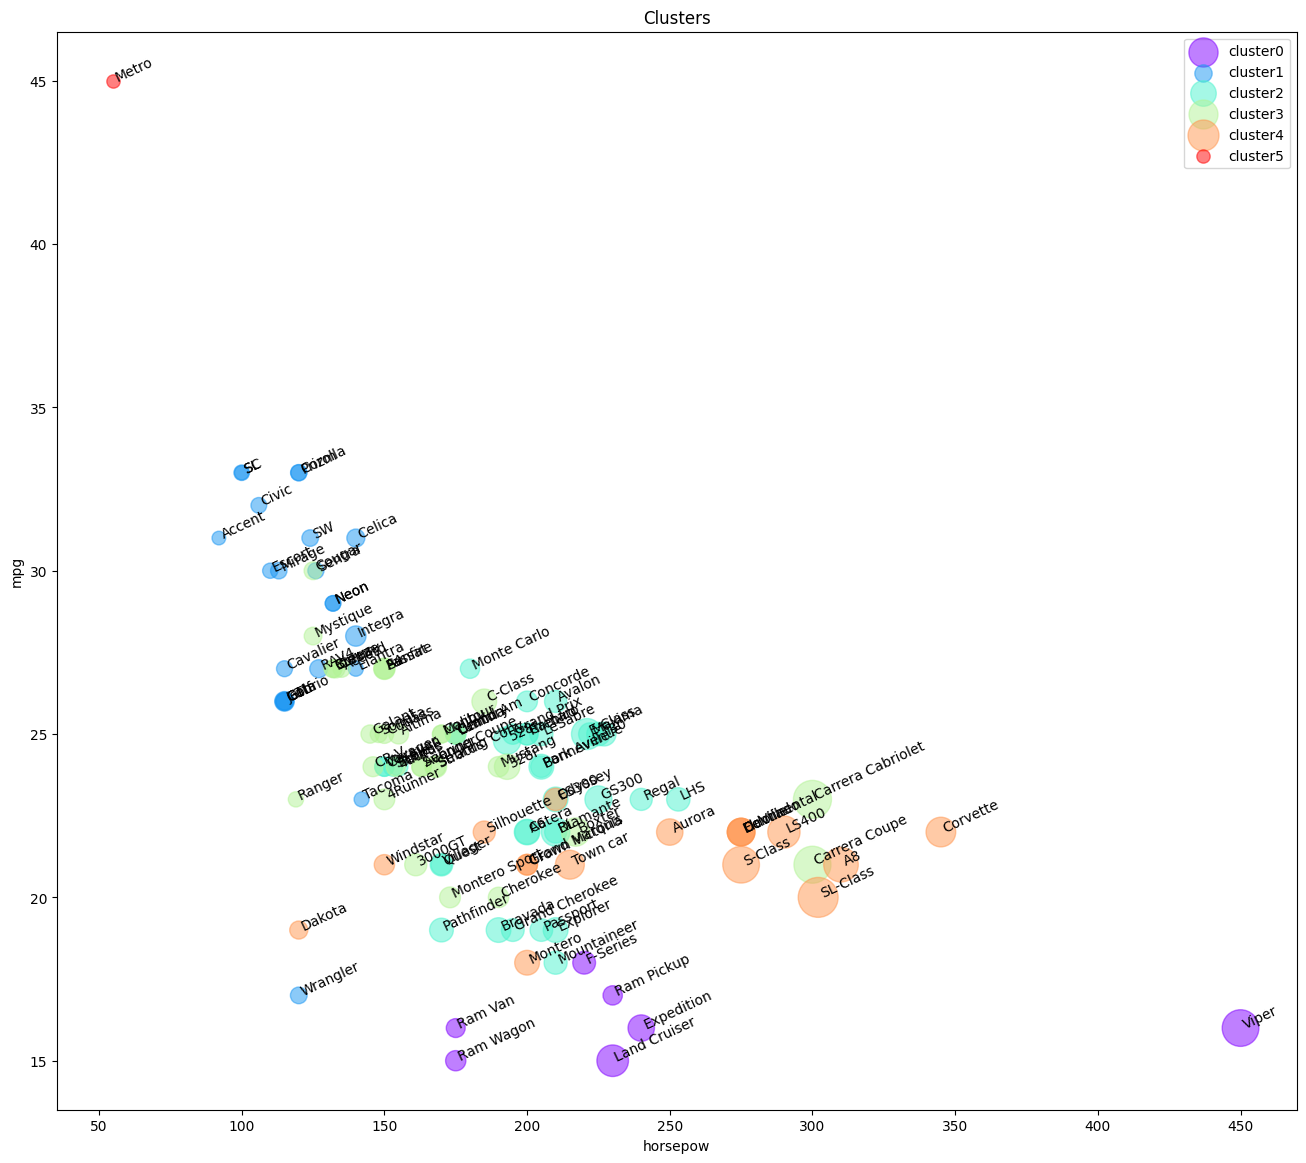

In [98]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df1[df1.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [99]:
df1.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0        1
          1        6
1         0       20
          1        3
2         0       26
          1       10
3         0       28
          1        5
4         0       12
          1        5
5         0        1
Name: cluster_, dtype: int64

In [101]:
# Agrupar por cluster y tipo de auto, y calcular promedios
agg_cars = df1.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

# Mostrar los resultados
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0     450.000000  8.000000  16.000000  69.725000
         1     211.666667  4.483333  16.166667  29.024667
1        0     118.500000  1.890000  29.550000  14.226100
         1     129.666667  2.300000  22.333333  14.292000
2        0     203.615385  3.284615  24.223077  27.988692
         1     182.000000  3.420000  20.300000  26.120600
3        0     168.107143  2.557143  25.107143  24.693786
         1     155.600000  2.840000  22.000000  19.807000
4        0     267.666667  4.566667  21.416667  46.417417
         1     173.000000  3.180000  20.600000  24.308400
5        0      55.000000  1.000000  45.000000   9.235000

Text(0, 0.5, 'mpg')

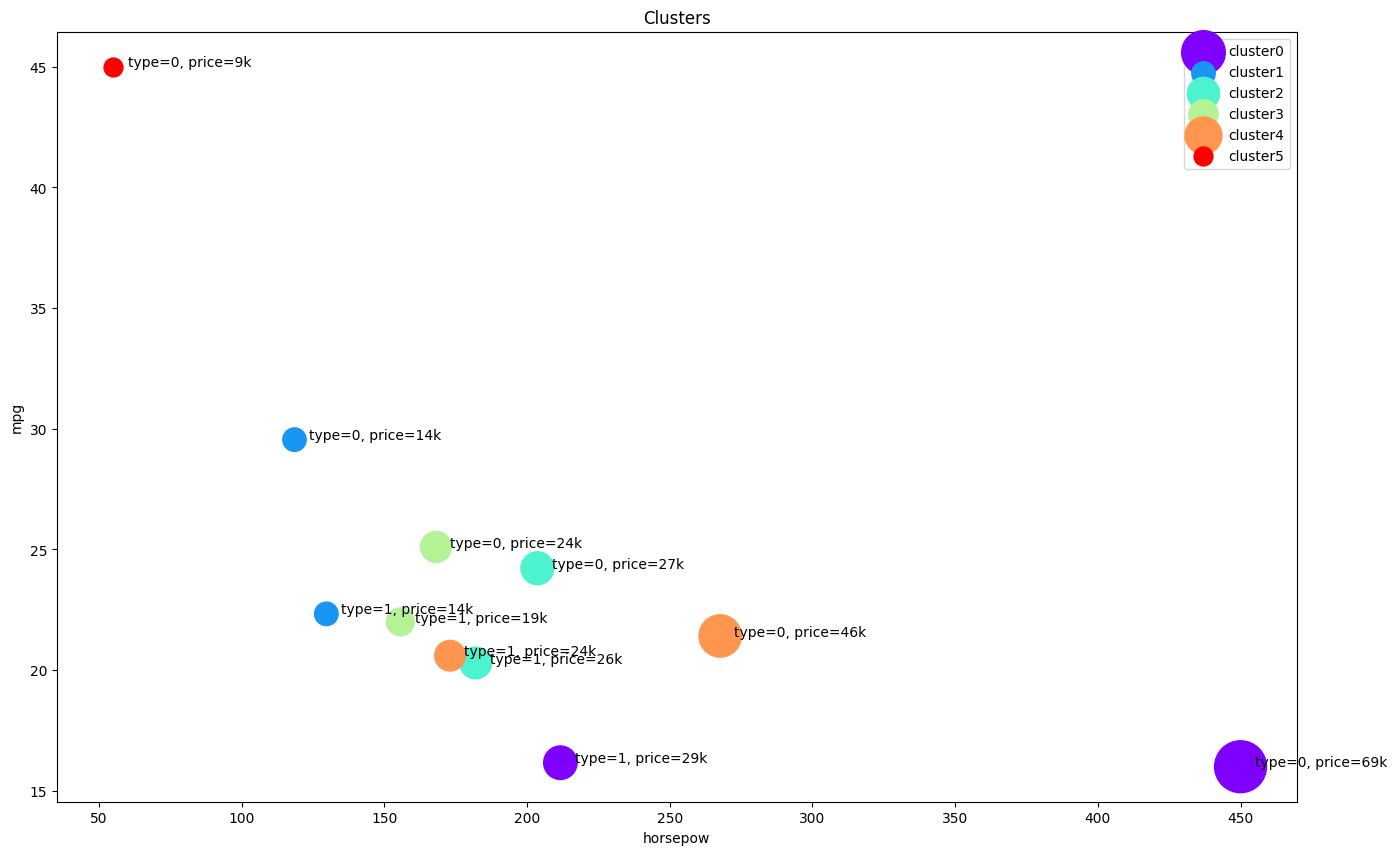

In [102]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [103]:
import pandas as pd

# Cargar el archivo de películas
movies_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\movies.csv')

# Mostrar las primeras filas
movies_df.head()

,Id,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [106]:
import pandas as pd

# Cargar archivo de calificaciones
rating_df = pd.read_csv(r'C:\Users\luisb\Desktop\MLEssentials\ratings.csv')

# Ver todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar primeras filas
rating_df.head()

,Id,MovieId,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [107]:
movies_df.rename(columns = {'Title':'title'}, inplace = True)
movies_df.rename(columns = {'Genres':'genres'}, inplace = True)
movies_df

,Id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [108]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,Id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [109]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,Id,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


In [110]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,Id,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Eliminar la columna 'Timestamp'
rating_df = rating_df.drop('Timestamp', axis=1)

# Ver las primeras filas
rating_df.head()

,Id,MovieId,Rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [113]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [117]:
# Lista de películas que tú (el usuario) calificaste
userInput = [
    {'title': 'Toy Story (1995)', 'rating': 4.5},
    {'title': 'Jumanji (1995)', 'rating': 3.0},
    {'title': 'Heat (1995)', 'rating': 5.0}
]

inputMovies = pd.DataFrame(userInput)

In [118]:
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
print(inputId)

   Id             title                                             genres  \
0   1  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]   
1   2    Jumanji (1995)                     [Adventure, Children, Fantasy]   
5   6       Heat (1995)                          [Action, Crime, Thriller]   

   year  
0  1995  
1  1995  
5  1995  


In [119]:
inputMovies = pd.merge(inputId, inputMovies, on='title')
inputMovies = inputMovies.drop('genres', axis=1)

In [120]:
print(movies_df['title'].head(20))

0                          Toy Story (1995)
1                            Jumanji (1995)
2                   Grumpier Old Men (1995)
3                  Waiting to Exhale (1995)
4        Father of the Bride Part II (1995)
5                               Heat (1995)
6                            Sabrina (1995)
7                       Tom and Huck (1995)
8                       Sudden Death (1995)
9                          GoldenEye (1995)
10           American President, The (1995)
11       Dracula: Dead and Loving It (1995)
12                             Balto (1995)
13                             Nixon (1995)
14                  Cutthroat Island (1995)
15                            Casino (1995)
16             Sense and Sensibility (1995)
17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
19                       Money Train (1995)
Name: title, dtype: object


In [121]:
import pandas as pd

# Películas calificadas por el usuario (títulos exactos del dataset)
userInput = [
    {'title': 'Toy Story (1995)', 'rating': 5.0},
    {'title': 'Jumanji (1995)', 'rating': 3.5},
    {'title': 'Heat (1995)', 'rating': 4.5},
    {'title': 'GoldenEye (1995)', 'rating': 4.0}
]

In [122]:
# Filtrar películas del dataset que coincidan con los títulos del usuario
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]

# Unir para obtener movieId + rating
inputMovies = pd.merge(inputId, inputMovies, on='title')

# Eliminar columnas innecesarias si existen
if 'genres' in inputMovies.columns:
    inputMovies = inputMovies.drop('genres', axis=1)
if 'year' in inputMovies.columns:
    inputMovies = inputMovies.drop('year', axis=1)

# Mostrar resultado final
print(inputMovies)

   Id_x             title year_x  Id_y year_y  rating
0     1  Toy Story (1995)   1995     1   1995     4.5
1     2    Jumanji (1995)   1995     2   1995     3.0
2     6       Heat (1995)   1995     6   1995     5.0


In [125]:
print(moviesWithGenres_df.columns)

Index(['Id', 'title', 'genres', 'year', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'],
      dtype='object')


In [127]:
print(inputMovies.columns)

Index(['Id_x', 'title', 'year_x', 'Id_y', 'year_y', 'rating'], dtype='object')


In [128]:
userMovies = moviesWithGenres_df[moviesWithGenres_df['Id'].isin(inputMovies['Id_x'].tolist())]

In [129]:
inputMovies = inputMovies.rename(columns={'Id_x': 'Id', 'year_x': 'year'})

In [130]:
userMovies = moviesWithGenres_df[moviesWithGenres_df['Id'].isin(inputMovies['Id'].tolist())]

In [132]:
inputMovies = pd.merge(inputId, inputMovies, on='title', suffixes=('_left', '_right'))

In [133]:
inputId = inputId.drop(columns=['year', 'Id'])
inputMovies = pd.merge(inputId, inputMovies, on='title')

In [136]:
print(inputMovies.columns)

Index(['title', 'genres', 'genres_x', 'Id_left', 'genres_y', 'year_left',
       'Id_right', 'year_right', 'Id_y', 'year_y', 'rating'],
      dtype='object')


In [137]:
# Renombrar las columnas para claridad
inputMovies = inputMovies.rename(columns={
    'Id_left': 'Id',
    'year_left': 'year'
})

# Eliminar columnas duplicadas o que no necesitas
inputMovies = inputMovies.drop(columns=['genres_x', 'genres_y', 'Id_right', 'year_right', 'Id_y', 'year_y'])

# Mostrar el resultado limpio
print(inputMovies.head())

              title                                             genres  Id  \
0  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]   1   
1    Jumanji (1995)                     [Adventure, Children, Fantasy]   2   
2       Heat (1995)                          [Action, Crime, Thriller]   6   

   year  rating  
0  1995     4.5  
1  1995     3.0  
2  1995     5.0  


In [139]:
userGenreTable = userMovies.drop('Id', axis=1).drop('title', axis=1).drop('genres', axis=1).drop('year', axis=1)

In [141]:
userGenreTable = userMovies.drop(columns=['Id', 'title', 'genres', 'year'])
print(userGenreTable.head())

   Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  Action  \
0        1.0        1.0       1.0     1.0      1.0      0.0    0.0     0.0   
1        1.0        0.0       1.0     0.0      1.0      0.0    0.0     0.0   
2        0.0        0.0       0.0     0.0      0.0      0.0    0.0     1.0   

   Crime  Thriller  Horror  Mystery  Sci-Fi  War  Musical  Documentary  IMAX  \
0    0.0       0.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   
1    0.0       0.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   
2    1.0       1.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   

   Western  Film-Noir  (no genres listed)  
0      0.0        0.0                 0.0  
1      0.0        0.0                 0.0  
2      0.0        0.0                 0.0  


In [142]:
inputMovies['rating']

0    4.5
1    3.0
2    5.0
Name: rating, dtype: float64

In [143]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             7.5
Animation             4.5
Children              7.5
Comedy                4.5
Fantasy               7.5
Romance               0.0
Drama                 0.0
Action                5.0
Crime                 5.0
Thriller              5.0
Horror                0.0
Mystery               0.0
Sci-Fi                0.0
War                   0.0
Musical               0.0
Documentary           0.0
IMAX                  0.0
Western               0.0
Film-Noir             0.0
(no genres listed)    0.0
dtype: float64

In [146]:
genreTable = moviesWithGenres_df.set_index('Id')
genreTable = genreTable.drop(columns=['title', 'genres', 'year'])
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
Id,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
genreTable.shape

(9742, 20)

In [148]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

Id
1    0.677419
2    0.483871
3    0.096774
4    0.096774
5    0.096774
dtype: float64

In [149]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

Id
26340     0.784946
2987      0.784946
51939     0.784946
108932    0.784946
2414      0.698925
dtype: float64

In [150]:
#The final recommendation table
movies_df.loc[movies_df['Id'].isin(recommendationTable_df.head(20).keys())]

,Id,title,genres,year
478,546,Super Mario Bros. (1993),"[Action, Adventure, Children, Comedy, Fantasy,...",1993
488,558,"Pagemaster, The (1994)","[Action, Adventure, Animation, Children, Fantasy]",1994
1480,2005,"Goonies, The (1985)","[Action, Adventure, Children, Comedy, Fantasy]",1985
1814,2414,Young Sherlock Holmes (1985),"[Action, Adventure, Children, Fantasy, Mystery...",1985
2250,2987,Who Framed Roger Rabbit? (1988),"[Adventure, Animation, Children, Comedy, Crime...",1988
2355,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]",1999
2572,3440,Teenage Mutant Ninja Turtles III (1993),"[Action, Adventure, Children, Comedy, Fantasy]",1993
3568,4886,"Monsters, Inc. (2001)","[Adventure, Animation, Children, Comedy, Fantasy]",2001
4348,6350,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,"[Action, Adventure, Animation, Children, Fanta...",1986
5490,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976


In [151]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = rating_df[rating_df['MovieId'].isin(inputMovies['Id'].tolist())]
userSubset.head()

,Id,MovieId,Rating
0,1,1,4.0
2,1,6,4.0
516,5,1,4.0
560,6,2,4.0
564,6,6,4.0


In [152]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['Id'])

In [153]:
#Let's look at one of the users, e.g. the one with userID=5.
userSubsetGroup.get_group(5)

,Id,MovieId,Rating
516,5,1,4.0


In [154]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[0:3]

[((18,),
        Id  MovieId  Rating
  1772  18        1     3.5
  1773  18        2     3.0
  1774  18        6     4.0),
 ((68,),
         Id  MovieId  Rating
  10360  68        1     2.5
  10361  68        2     2.5
  10364  68        6     4.0),
 ((82,),
         Id  MovieId  Rating
  12730  82        1     2.5
  12731  82        2     3.0
  12732  82        6     3.5)]

In [155]:
# This limit is imposed because we don't want to waste too much time going through every single user.
userSubsetGroup = userSubsetGroup[0:100]

In [156]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='Id')
    inputMovies = inputMovies.sort_values(by='Id')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['Id'].isin(group['Id'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['Rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [157]:
pearsonCorrelationDict.items()

dict_items([((18,), 0), ((68,), 0), ((82,), 0), ((91,), 0), ((112,), 0), ((140,), 0), ((160,), 0), ((202,), 0), ((217,), 0), ((219,), 0), ((274,), 0), ((353,), 0), ((373,), 0), ((380,), 0), ((414,), 0), ((434,), 0), ((470,), 0), ((474,), 0), ((480,), 0), ((559,), 0), ((561,), 0), ((573,), 0), ((590,), 0), ((599,), 0), ((604,), 0), ((1,), 0), ((6,), 0), ((19,), 0), ((21,), 0), ((27,), 0), ((32,), 0), ((44,), 0), ((45,), 0), ((57,), 0), ((62,), 0), ((64,), 0), ((93,), 0), ((103,), 0), ((107,), 0), ((117,), 0), ((121,), 0), ((135,), 0), ((144,), 0), ((153,), 0), ((166,), 0), ((169,), 0), ((177,), 0), ((182,), 0), ((186,), 0), ((191,), 0), ((220,), 0), ((226,), 0), ((232,), 0), ((239,), 0), ((240,), 0), ((249,), 0), ((266,), 0), ((269,), 0), ((270,), 0), ((276,), 0), ((282,), 0), ((288,), 0), ((294,), 0), ((298,), 0), ((304,), 0), ((305,), 0), ((307,), 0), ((308,), 0), ((314,), 0), ((318,), 0), ((322,), 0), ((323,), 0), ((330,), 0), ((336,), 0), ((337,), 0), ((339,), 0), ((347,), 0), ((357

In [158]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0,"(18,)"
1,0,"(68,)"
2,0,"(82,)"
3,0,"(91,)"
4,0,"(112,)"


In [162]:
print(userMovies.columns)

Index(['Id', 'title', 'genres', 'year', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'],
      dtype='object')


In [165]:
userMovies['rating'] = [5, 4, 4.5]  # ← Solo 3 calificaciones

In [166]:
userGenreTable = userMovies.drop(columns=['Id', 'title', 'genres', 'year'])
userProfile = userGenreTable.T.dot(userMovies['rating'])  # perfil del usuario

In [167]:
userProfile

Adventure              9.00
Animation              5.00
Children               9.00
Comedy                 5.00
Fantasy                9.00
Romance                0.00
Drama                  0.00
Action                 4.50
Crime                  4.50
Thriller               4.50
Horror                 0.00
Mystery                0.00
Sci-Fi                 0.00
War                    0.00
Musical                0.00
Documentary            0.00
IMAX                   0.00
Western                0.00
Film-Noir              0.00
(no genres listed)     0.00
rating                61.25
dtype: float64

In [171]:
print(userProfile.index)

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir',
       '(no genres listed)', 'rating'],
      dtype='object')


In [176]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
import subprocess

# Ruta y nombre del archivo que quieres recuperar
archivo = 'machine_learning.ipynb'

# El hash del commit donde el archivo existía (puedes obtenerlo con 'git log')
commit_hash = 'abc1234'  # reemplaza con el hash real

# Ejecutar el comando git checkout para recuperar el archivo
subprocess.run(['git', 'checkout', commit_hash, '--', archivo])

CompletedProcess(args=['git', 'checkout', 'abc1234', '--', 'machine_learning.ipynb'], returncode=128)